## 230968364 week3
### Exercise 2 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

df=pd.read_csv("D:\MIT\ML\LAB\week3\Iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


### 1. For the IRIS data set write down the meta information.

In [5]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


### 2. Visualize the class label against the predictor variable using appropriate plots. 

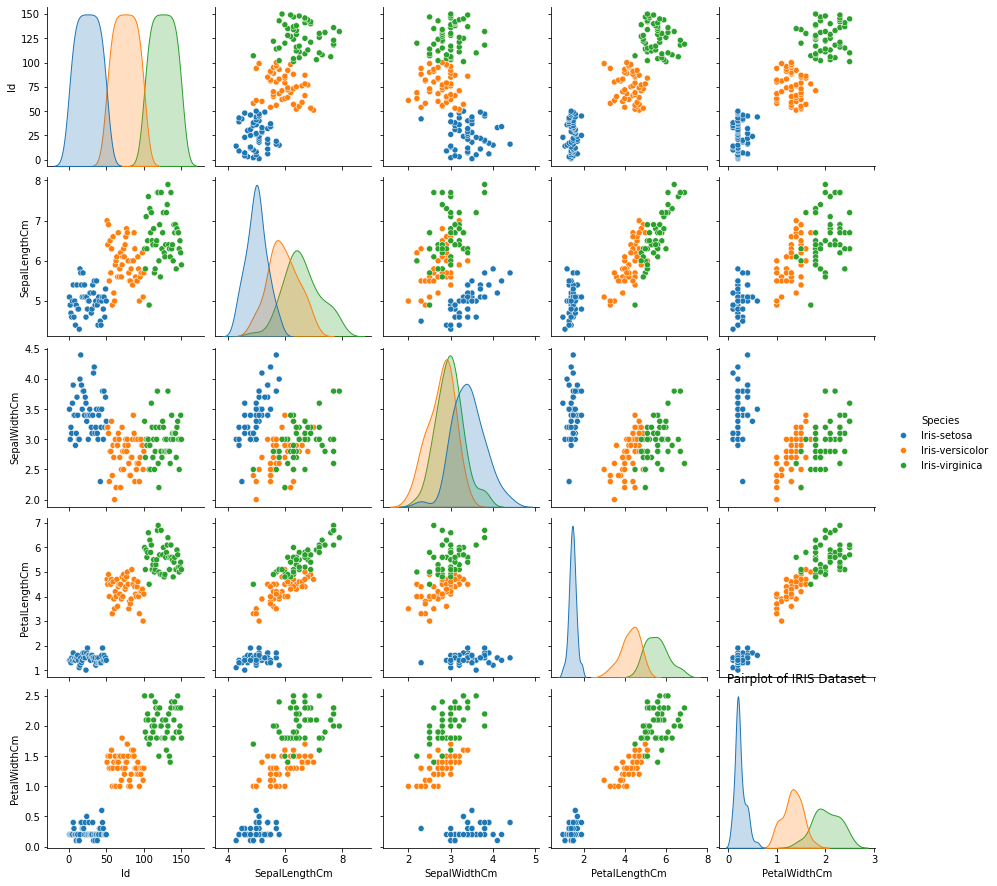

In [6]:
sns.pairplot(df, hue="Species")
plt.title("Pairplot of IRIS Dataset")
plt.show()

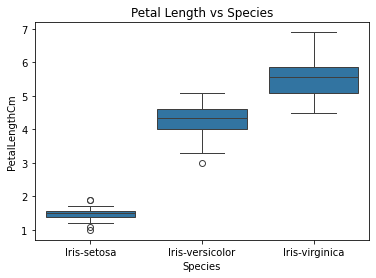

In [8]:
sns.boxplot(x='Species', y='PetalLengthCm', data=df)
plt.title('Petal Length vs Species')
plt.show()

### 3. Use the IRIS data set to build a logistic regression model (using sklearn) and predict the class label ‘Species’. Divide the dataset into training and test set (70,30) using train_test_split method in sklearn.

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

X = df.drop(columns=['Id', 'Species'])
y = df['Species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

log_reg = LogisticRegression(max_iter=200)

log_reg.fit(X_train, y_train)

y_pred_log_reg = log_reg.predict(X_test)

accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print(f"Logistic Regression Accuracy: {accuracy_log_reg * 100:.2f}%")

cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
print("Confusion Matrix for Logistic Regression:")
print(cm_log_reg)

Logistic Regression Accuracy: 100.00%
Confusion Matrix for Logistic Regression:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


### 4. Analysis and visualize the performance of the classifier using metrics, confusion matrix.

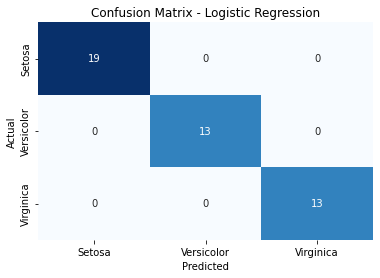

In [10]:
sns.heatmap(cm_log_reg, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Setosa', 'Versicolor', 'Virginica'], 
            yticklabels=['Setosa', 'Versicolor', 'Virginica'])
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### 5. Use the IRIS data and KNeighborsClassifier (using sklearn) and predict the class label ‘Species’ for k value between 2 and 20. Divide the dataset into training and test set (70,30) using train_test_split method in sklearn. 

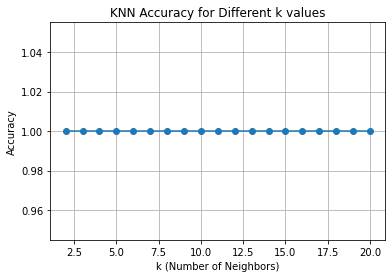

In [11]:
from sklearn.neighbors import KNeighborsClassifier

k_values = list(range(2, 21))
accuracy_knn = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    y_pred_knn = knn.predict(X_test)
    
    accuracy_knn.append(accuracy_score(y_test, y_pred_knn))

plt.plot(k_values, accuracy_knn, marker='o')
plt.title('KNN Accuracy for Different k values')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

### 6. Identify the best k (for k between 2 and 20) for the model built. 

In [12]:
best_k = k_values[accuracy_knn.index(max(accuracy_knn))]
print(f"The best k value for KNN is: {best_k}")

The best k value for KNN is: 2


### 7. Comment on the classifier (Logistic Regression or KNeighborsClassifier ) that has a better performance for the IRIS dataset.

In [14]:
#Both Logistic Regression and KNN achieved 100% accuracy, which means both perform extremely well on the Iris dataset.

#Logistic Regression is simpler to comprehend, faster, and more explicit, so it is a fine option for this problem. It performs particularly well on datasets such as Iris that can easily be divided using a straight line.

#KNN is less linear and more versatile, but performs equally well here. Its performance can, however, be influenced by the selection of k and could require additional computer power for larger datasets.